In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("iris.csv")

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.shape

(150, 5)

In [9]:
print(df.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


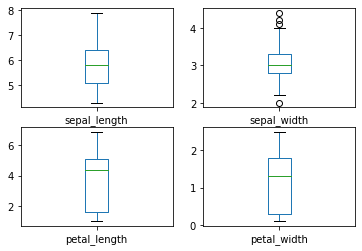

In [10]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

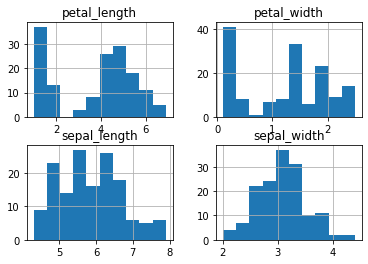

In [11]:
df.hist()
plt.show()

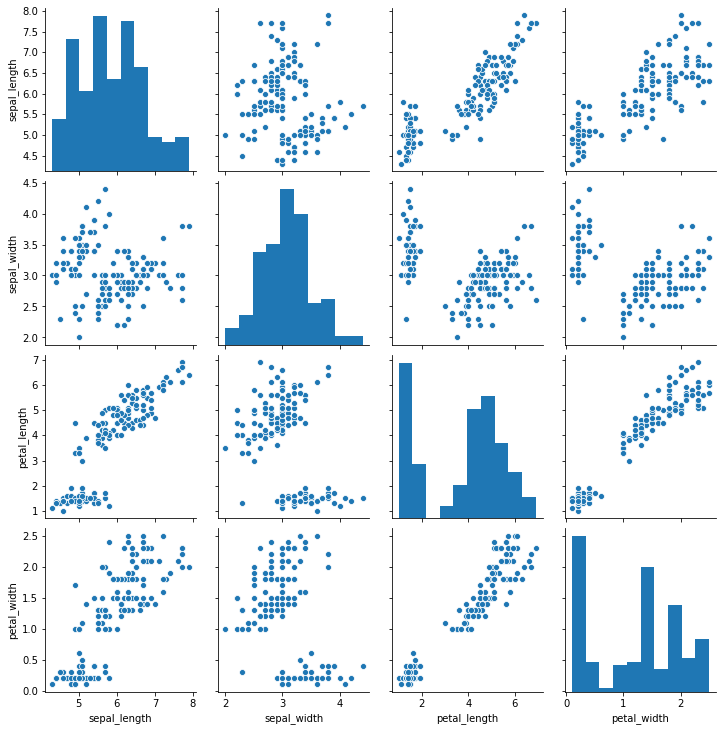

In [12]:
sns.pairplot(df)

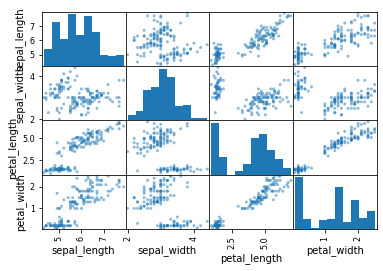

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [14]:
array = df.values
X = array[:,0:4]
Y = array[:,4]

In [15]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [16]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [17]:
logit.fit(X_train,Y_train)

C:\Users\Prithvi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
print("accuracy :" , logit.score(X_validation,Y_validation))

accuracy : 0.8666666666666667


In [19]:
logit.predict(X_validation)

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [20]:
mysample = np.array([4.9,3.0,1.4,0.2])
ex1 = mysample.reshape(1,-1)

In [21]:
logit.predict(ex1)

array(['setosa'], dtype=object)

In [22]:
import pickle

pickle.dump(logit,open('logit_model_iris.pkl','wb'))

In [23]:
import joblib as jb
logit_model = jb.load('logit_model_iris.pkl')

In [24]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [26]:
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
svm = SVC()

In [27]:
knn.fit(X_train, Y_train)
print("accuracy :" , knn.score(X_validation,Y_validation))

accuracy : 0.9


In [28]:
jb.dump(knn, 'knn_model_iris.pkl')

['knn_model_iris.pkl']

In [29]:
svm.fit(X_train, Y_train)
print("accuracy :" , svm.score(X_validation,Y_validation))

accuracy : 0.8666666666666667


In [30]:
jb.dump(svm, 'svm_model_iris.pkl')

['svm_model_iris.pkl']